In [1]:
%load_ext autoreload

# Auto reloading causes the kernel to reload the libraries we have
%autoreload 2

import requests

import ddsl_load_tester as load_tester

# Testing Functionality

In [22]:
load_tester.get_current_stats()

{'current_response_time_percentile_50': None,
 'current_response_time_percentile_95': None,
 'errors': [],
 'fail_ratio': 0.0,
 'state': 'ready',
 'stats': [{'avg_content_length': 0,
   'avg_response_time': 0,
   'current_rps': 0.0,
   'max_response_time': 0,
   'median_response_time': 0,
   'method': None,
   'min_response_time': 0,
   'name': 'Total',
   'num_failures': 0,
   'num_requests': 0}],
 'total_rps': 0.0,
 'user_count': 0}

In [5]:
load_tester.set_target_user_count(50)

True

In [6]:
load_tester.reset_stats()

True

In [7]:
load_tester.stop_test()

True

In [28]:
load_tester.get_current_stats()

{'current_response_time_percentile_50': None,
 'current_response_time_percentile_95': None,
 'errors': [],
 'fail_ratio': 0.0,
 'state': 'ready',
 'stats': [{'avg_content_length': 0,
   'avg_response_time': 0,
   'current_rps': 0.0,
   'max_response_time': 0,
   'median_response_time': 0,
   'method': None,
   'min_response_time': 0,
   'name': 'Total',
   'num_failures': 0,
   'num_requests': 0}],
 'total_rps': 0.0,
 'user_count': 0}

# Testing Object

In [8]:
lt = load_tester.DdslLoadTester(hatch_rate=100, temp_stat_max_len=5, base='http://localhost:8089/')
lt.change_count(50)

True

In [9]:
lt.start_capturing()

In [15]:
temp_stats = lt.get_temp_stats()
temp_stats

[{'current_response_time_percentile_50': 57.43908882141113,
  'current_response_time_percentile_95': 98.80471229553223,
  'errors': [],
  'fail_ratio': 0.0,
  'state': 'running',
  'stats': [{'avg_content_length': 4.0,
    'avg_response_time': 45.568084716796875,
    'current_rps': 0.0,
    'max_response_time': 98.80471229553223,
    'median_response_time': 28.05781364440918,
    'method': 'GET',
    'min_response_time': 24.00517463684082,
    'name': '/function/pyfibo/',
    'num_failures': 0,
    'num_requests': 15},
   {'avg_content_length': 4.0,
    'avg_response_time': 45.568084716796875,
    'current_rps': 0.0,
    'max_response_time': 98.80471229553223,
    'median_response_time': 28.05781364440918,
    'method': None,
    'min_response_time': 24.00517463684082,
    'name': 'Total',
    'num_failures': 0,
    'num_requests': 15}],
  'total_rps': 0.0,
  'user_count': 50,
  'time': 1556743350.3435028},
 {'current_response_time_percentile_50': 36.06247901916504,
  'current_response

In [16]:
load_tester.get_stats_arr(temp_stats, 'current_response_time_percentile_50')

[57.43908882141113,
 36.06247901916504,
 26.9467830657959,
 26.9467830657959,
 24.608612060546875]

In [17]:
load_tester.get_stats_arr_stats(temp_stats, 'avg_response_time')

[45.568084716796875,
 55.91193267277309,
 49.9715656042099,
 49.9715656042099,
 34.6970796585083]

In [10]:
lt.stop_test()

True

# Testing Sequence

In [39]:
import time

loop_timer = load_tester.TimerClass()
total_timer = load_tester.TimerClass()

user_sequence = [50,100,500,1000,1000,1000,500,100,50]
lt = load_tester.DdslLoadTester(hatch_rate=100, temp_stat_max_len=5, base='http://localhost:8089/')
lt.change_count(user_sequence[0])
lt.start_capturing()

loop_timer.tic()
total_timer.tic()

from tqdm.autonotebook import tqdm
tqdm.pandas()

results = []
for i in tqdm(range(len(user_sequence))):
    user_count = user_sequence[i]
    lt.change_count(user_count)
    
    time.sleep(60 - loop_timer.toc())
    
    loop_timer.tic()
    
    temp_stats = lt.get_temp_stats()
    result = {}
    result['avg_response_time'] = np.mean(np.array(load_tester.get_stats_arr_stats(temp_stats, 'avg_response_time')))
    result['max_response_time'] = np.max(np.array(load_tester.get_stats_arr_stats(temp_stats, 'max_response_time')))
    result['min_response_time'] = np.min(np.array(load_tester.get_stats_arr_stats(temp_stats, 'min_response_time')))
    result['fail_ratio'] = np.mean(np.array(load_tester.get_stats_arr(temp_stats, 'fail_ratio')))
    result['user_count'] = user_count
    result['time'] = total_timer.toc() / 60
    results.append(result)
    
lt.stop_test()

In [40]:
import pandas as pd

res = pd.DataFrame(data=results)

Text(0, 0.5, 'Fail Ratio')

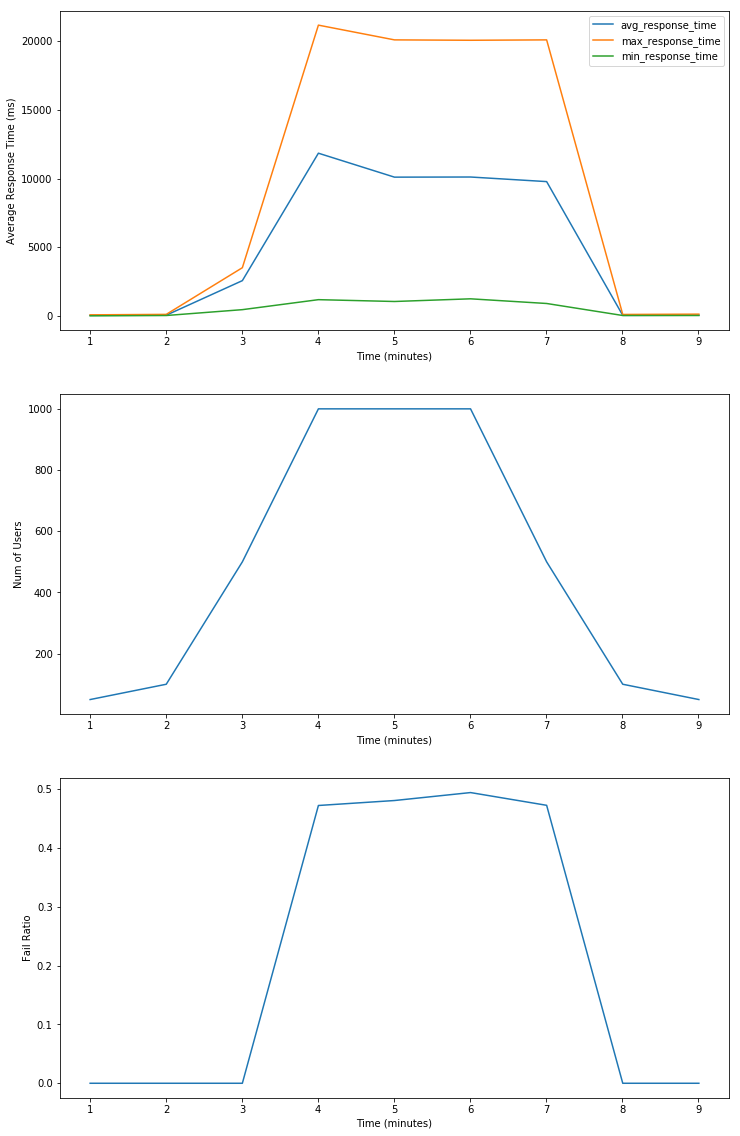

In [41]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(12,20))
plt.subplot(311)
plt.plot(res['time'], res['avg_response_time'], label='avg_response_time')
plt.plot(res['time'], res['max_response_time'], label='max_response_time')
plt.plot(res['time'], res['min_response_time'], label='min_response_time')
plt.xlabel('Time (minutes)')
plt.ylabel('Average Response Time (ms)')
plt.legend()

plt.subplot(312)
plt.plot(res['time'], res['user_count'])
plt.xlabel('Time (minutes)')
plt.ylabel('Num of Users')

plt.subplot(313)
plt.plot(res['time'], res['fail_ratio'])
plt.xlabel('Time (minutes)')
plt.ylabel('Fail Ratio')